In [5]:
import numpy as np
from matplotlib import pyplot as plt

In [4]:
# クリック率θに相当する配列
# θは0以上1以下の連続値だがコンピュータだとそのまま扱えないので、できるだけ細かく刻んだ確率変数の配列を用意して信念p(θ)を確立質量関数に近似させる
thetas = np.linspace(0, 1, 1001)
print(thetas)

[0.    0.001 0.002 ... 0.998 0.999 1.   ]


In [6]:
# 尤度関数
# 以下式をシンプルに書き下した形
# p(r = 1 | θ) = θ
# p(r = 0 | θ) = 1 - θ
# rには0か1が入る
likelihood = lambda r: thetas if r else (1 - thetas)

In [7]:
# 事後分布を算出する関数
# 尤度関数と事前分布の積を合計が1になるように正規化したもの
# 尤度関数と事前分布の積をlpとし、その合計lp.sum()で割る
def posterior(r, prior):
    lp = likelihood(r) * prior
    return lp / lp.sum()

In [12]:
# 信念p(θ) = 事前分布(ここでは一様分布にしてる)
p = np.array([1 / len(thetas) for _ in thetas])
print(p)

[0.000999 0.000999 0.000999 ... 0.000999 0.000999 0.000999]


In [13]:
p = posterior(1, p) # クリック
print(p)

[0.00000000e+00 1.99800200e-06 3.99600400e-06 ... 1.99400599e-03
 1.99600400e-03 1.99800200e-03]


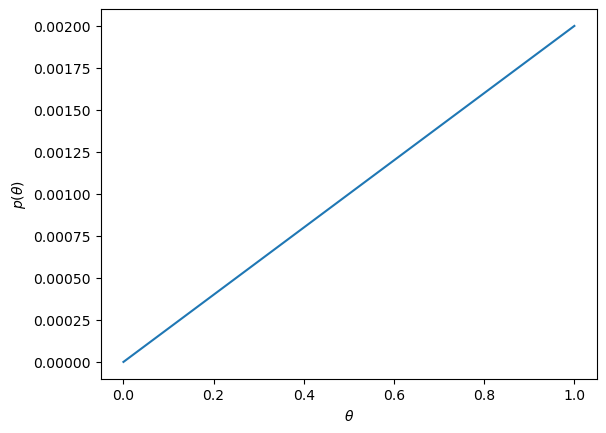

In [14]:
plt.plot(thetas, p)
plt.xlabel(r'$\theta$')
plt.ylabel(r'$p(\theta)$')
plt.show()

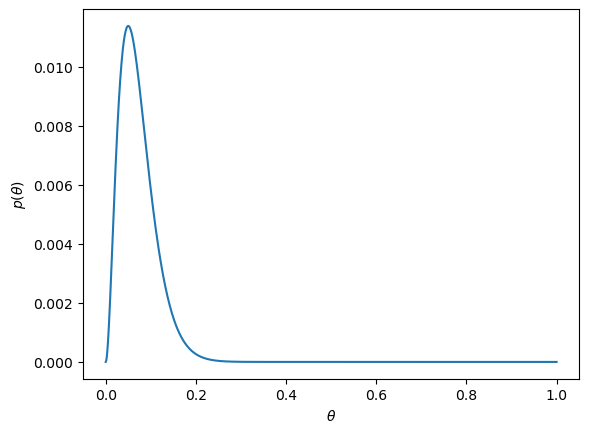

In [20]:
# アリスのレポートのデザイン案A
clicks = 2
noclicks = 38

# 事前分布(一様分布)
p = np.array([1 / len(thetas) for theta in thetas])

# ベイズ更新
for _ in range(clicks):
    p = posterior(1, p)
for _ in range(noclicks):
    p = posterior(0, p)

plt.plot(thetas, p)
plt.xlabel(r'$\theta$')
plt.ylabel(r'$p(\theta)$')
plt.show()

In [22]:
def posterior_by_report(imps, clicks):
    noclicks = imps - clicks
    
    # 事前分布(一様分布)
    p = np.array([1 / len(thetas) for theta in thetas])

    # ベイズ更新
    for _ in range(clicks):
        p = posterior(1, p)
    for _ in range(noclicks):
        p = posterior(0, p)
    return p

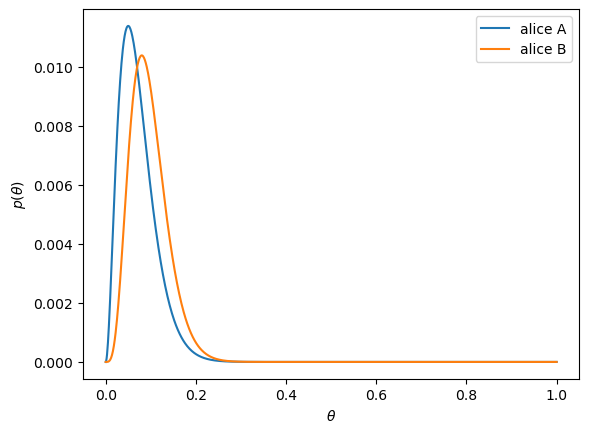

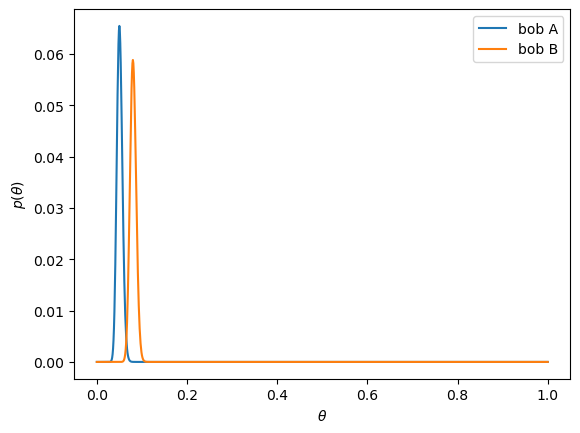

In [35]:
# アリスのレポートのデザイン案A
alice_a_clicks = 2
alice_a_imps = 40

# アリスのレポートのデザイン案B
alice_b_clicks = 4
alice_b_imps = 50

# ボブのレポートのデザイン案A
bob_a_clicks = 64
bob_a_imps = 1280

# アリスのレポートのデザイン案B
bob_b_clicks = 128
bob_b_imps = 1600

alice_a_p = posterior_by_report(alice_a_imps, alice_a_clicks)
alice_b_p = posterior_by_report(alice_b_imps, alice_b_clicks)

plt.plot(thetas, alice_a_p, label="alice A")
plt.plot(thetas, alice_b_p, label="alice B")
plt.xlabel(r'$\theta$')
plt.ylabel(r'$p(\theta)$')
plt.legend() # 凡例の表示
plt.show()

bob_a_p = posterior_by_report(bob_a_imps, bob_a_clicks)
bob_b_p = posterior_by_report(bob_b_imps, bob_b_clicks)

plt.plot(thetas, bob_a_p, label="bob A")
plt.plot(thetas, bob_b_p, label="bob B")
plt.xlabel(r'$\theta$')
plt.ylabel(r'$p(\theta)$')
plt.legend() # 凡例の表示
plt.show()